In [2]:
import pandas as pd
import numpy as np
import spacy
#importing plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import re
from wordcloud import WordCloud
from plotly.offline import plot


# pip install pdfx
import pdfx
pdf = pdfx.PDFx("/Users/brunoflaven/Documents/01_work/blog_articles/extending_streamlit_usage/003_99_ambitieuses_derwenai_spacy_tutorials/article_bf_2.pdf")
# print("\n--- step_1 pdf loaded")
# pdf

text = pdf.get_text()
# text
# print("\n--- step_2 text loaded")
# text

import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")
# nlp = spacy.load('fr_core_news_sm')
doc = nlp(text)
# print("\n--- step_3 spacy loaded")



In [3]:

# print("\n--- step_7 spacy doc object into pandas dataframe")
# GREAT load the spacy doc object into into a dataframe of the parsed tokens
import pandas as pd

cols = ("text", "lemma", "POS", "explain", "stopword")
rows = []

for t in doc:
    if t.is_stop == False and t.text.isalpha() == True:
        # print(t.text)
        row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
        rows.append(row)

# We can either keep it in dictionary format or put it into a pandas dataframe
pd.set_option('max_colwidth',150)
data_df = pd.DataFrame(rows, columns=cols)
data_df = data_df.sort_index()

# OUTPUT
# data_df
# data_df.head()



In [5]:

from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.fr.stop_words import STOP_WORDS
import string

from spacy.lang.en import English
# from spacy.lang.fr import French
filtro = list(STOP_WORDS)
pontu = string.punctuation

parser = English()
# parser = French()
# for EN 
blacklist = {}

# for PT 
# blacklist = {'a', 'e', 'o', 'que'}

# for FR 
blacklist = {'j\'','y', 'a', 'et', 'que'}

def token_treatment(titulos):
  tokens = parser(titulos)
  tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
  tokens = [word for word in tokens if word not in filtro and word not in pontu]
  tokens = [word for word in tokens if word not in blacklist]
  return tokens

data_df['token'] = data_df.text.apply(token_treatment)
data_df.head()
# data_df.sample(5)
# data_df.info()


,text,lemma,POS,explain,stopword,token
0,Python,Python,PROPN,proper noun,False,[]
1,Randomization,Randomization,PROPN,proper noun,False,[]
2,Random,Random,PROPN,proper noun,False,[]
3,good,good,ADJ,adjective,False,[]
4,reasons,reason,NOUN,noun,False,[]


In [4]:
# number of rows
print('num of rows:', len(data_df), '\n')


num of rows: 300 



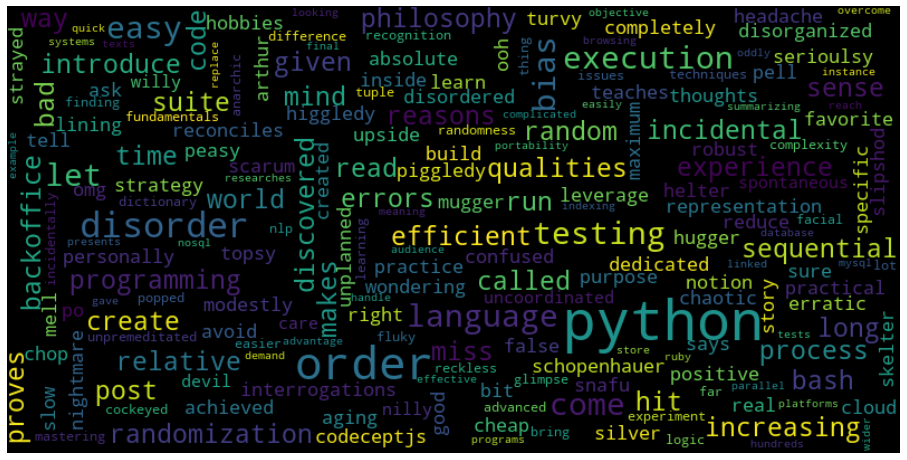

In [6]:

def wordcloud_gen(df, column_name):
    regex = r'\w+'
    names_combined = []
    for name in df[column_name]:
        words = re.findall(regex,name)
        words = [word.lower() for word in words]
        names_combined.extend(words)
    wordcloud = WordCloud(width=800, height=400,max_font_size=50, background_color="black", collocations=False).generate((" ").join(names_combined))
    plt.figure(figsize=(16,9))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    # plt.show()
    #Saving the plot as an image
    plt.savefig('Extract_Text_from_PDF_8.png', bbox_inches='tight', dpi=150)
    #Showing the plot
    # plt.show() 

# generate most used words in the names of ear buds
wordcloud_gen(data_df, 'text')
# some of the famous words